In [5]:
# Importing necessary libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import warnings 
warnings.filterwarnings("ignore")

In [6]:
credit_train = pd.read_csv("Credit_Amount_Train.csv", index_col = 0, header = 0)
credit_test = pd.read_csv("Credit_Amount_Test.csv", index_col = 0, header = 0)

In [7]:
credit_train

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
1,<0,6.0,A34,radio/TV,1169,unknown,A75,4,A93,A101,4.0,A121,67.0,A143,A152,2,A173,1,yes,foreigner
2,0-199,48.0,A32,radio/TV,5951,<100,A73,2,A92,A101,2.0,A121,22.0,A143,A152,1,A173,1,no,foreigner
3,unknown,12.0,A34,education,2096,<100,A74,2,A93,A101,3.0,A121,49.0,A143,A152,1,A172,2,no,foreigner
4,<0,42.0,A32,furniture/equipment,7882,<100,A74,2,A93,A103,4.0,A122,45.0,A143,A153,1,A173,2,no,foreigner
5,<0,24.0,A33,new_car,4870,<100,A73,3,A93,A101,4.0,A124,53.0,A143,A153,2,A173,2,no,foreigner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,?,9.0,A32,furniture/equipment,2301,100-499,A72,2,A92,A101,4.0,A122,22.0,A143,A151,1,A173,1,no,foreigner
797,<0,18.0,A32,old_car,7511,unknown,A75,1,A93,?,4.0,A122,51.0,A143,A153,1,A173,2,yes,foreigner
798,unknown,12.0,A34,furniture/equipment,1258,<100,A72,2,A92,A101,4.0,A122,22.0,A143,A151,2,A172,1,no,foreigner


In [8]:
credit_test

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,
1,unknown,24.0,A34,education,<100,A75,4,A93,A101,4.0,A124,54.0,A143,A153,2,A173,2,no,foreigner
2,0-199,18.0,A34,radio/TV,<100,A75,3,A92,A103,4.0,A121,48.0,A141,A151,2,A172,1,yes,foreigner
3,<0,NaN,A34,furniture/equipment,<100,A75,1,A92,A101,4.0,A122,24.0,A143,A152,2,A173,1,no,foreigner
4,unknown,12.0,A34,radio/TV,unknown,A75,4,A93,A101,NaN,A123,35.0,A143,A152,2,A173,1,no,foreigner
5,0-199,12.0,A32,new_car,unknown,A71,1,A92,A101,2.0,A121,24.0,A143,A151,1,A171,1,no,foreigner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,unknown,12.0,A32,furniture/equipment,<100,A74,3,A92,A101,4.0,A121,31.0,A143,A152,1,A172,1,no,foreigner
197,<0,30.0,A32,old_car,<100,A73,4,A91,?,4.0,A122,40.0,A143,A152,1,A174,1,yes,foreigner
198,unknown,12.0,A32,radio/TV,<100,A75,4,A93,A101,4.0,A123,38.0,A143,A152,1,A173,1,no,foreigner


In [9]:
print(credit_train.dtypes)
print()
print(credit_train.shape)
print()
print(credit_train.describe())
print()
print(credit_train.info())

account_info         object
duration_month      float64
credit_history       object
purpose              object
credit_amount         int64
savings_account      object
employment_st        object
poi                   int64
personal_status      object
gurantors            object
resident_since      float64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
dtype: object

(800, 20)

       duration_month  credit_amount         poi  resident_since         age  \
count      772.000000     800.000000  800.000000      787.000000  767.000000   
mean        20.645078    3190.976250    2.966250        2.822109   35.423729   
std         12.374860    2732.671789    1.128806        1.105788   11.714471   
min          4.000000     250.000000    1.000000        1.000000   19.000000   
25%         12

In [10]:
print(credit_test.dtypes)
print()
print(credit_test.shape)
print()
print(credit_test.describe())
print()
print(credit_test.info())

account_info         object
duration_month      float64
credit_history       object
purpose              object
savings_account      object
employment_st        object
poi                   int64
personal_status      object
gurantors            object
resident_since      float64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
dtype: object

(200, 19)

       duration_month         poi  resident_since         age  credits_no  \
count      190.000000  200.000000      194.000000  194.000000  200.000000   
mean        21.973684    3.000000        2.824742   36.108247    1.450000   
std         11.935645    1.079736        1.091752   11.167757    0.607739   
min          4.000000    1.000000        1.000000   20.000000    1.000000   
25%         12.000000    2.000000        2.000000   28.00

In [11]:
credit_train.isnull().sum()

account_info         0
duration_month      28
credit_history       0
purpose              0
credit_amount        0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            0
resident_since      13
property_type        0
age                 33
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

In [12]:
credit_test.isnull().sum()

account_info         0
duration_month      10
credit_history       0
purpose              0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            0
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

In [13]:
for i in credit_train.columns:
    print({i:credit_train[i].unique()})

{'account_info': array(['<0', '0-199', 'unknown', '?', '>=200'], dtype=object)}
{'duration_month': array([ 6., 48., 12., 42., 24., 36., 30., 15.,  9., 10.,  7., 60., 18.,
       45., 11., 27.,  8., 54., nan, 14., 33., 16.,  4., 47., 13., 22.,
       39., 28.,  5., 26., 72., 40.])}
{'credit_history': array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)}
{'purpose': array(['radio/TV', 'education', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'repairing', 'other',
       'upskilling'], dtype=object)}
{'credit_amount': array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,

In [14]:
for i in credit_test.columns:
    print({i:credit_test[i].unique()})

{'account_info': array(['unknown', '0-199', '<0', '>=200', '?'], dtype=object)}
{'duration_month': array([24., 18., nan, 12., 36.,  6., 42., 15.,  8., 48., 45.,  4.,  9.,
       10., 27., 11., 30., 28., 16., 60., 13.])}
{'credit_history': array(['A34', 'A32', 'A31', 'A30', 'A33'], dtype=object)}
{'purpose': array(['education', 'radio/TV', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'other', 'repairing',
       'upskilling'], dtype=object)}
{'savings_account': array(['<100', 'unknown', '500-999', '100-499', '>=1000'], dtype=object)}
{'employment_st': array(['A75', 'A71', 'A74', 'A72', 'A73'], dtype=object)}
{'poi': array([4, 3, 1, 2], dtype=int64)}
{'personal_status': array(['A93', 'A92', 'A94', 'A91'], dtype=object)}
{'gurantors': array(['A101', 'A103', '?', 'A102'], dtype=object)}
{'resident_since': array([ 4., nan,  2.,  1.,  3.])}
{'property_type': array(['A124', 'A121', 'A122', 'A123'], dtype=object)}
{'age': array([54., 48., 24., 35., 26.

In [15]:
# For Train
# account_info | gurantors | telephone | foreigner -- these columns have "?" 
# account_info | savings_account -- these columns have "unknown"
# duration_month | resident_since | age -- these columns have "nan" (missing values)

# For Test 
# account_info | gurantors | foreigner -- these columns have "?" 
# account_info | savings_account -- these columns have "unknown"
# duration_month | resident_since | age -- these columns have "nan" (missing values)

In [16]:
credit_train.loc[(credit_train["account_info"] == "?") | (credit_train["gurantors"] == "?") | (credit_train["telephone"] == "?") | (credit_train["foreigner"] == "?")]

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
12,<0,48.0,A32,business,4308,<100,A72,3,A92,?,4.0,A122,24.0,A143,A151,1,A173,1,no,?
17,unknown,24.0,A34,radio/TV,2424,unknown,A75,4,A93,A101,4.0,A122,53.0,A143,A152,2,A173,1,?,foreigner
25,?,10.0,A34,furniture/equipment,2069,unknown,A73,2,A94,A101,1.0,A123,26.0,A143,A152,2,A173,1,no,resident
27,unknown,6.0,A30,radio/TV,426,<100,A75,4,A94,?,4.0,A123,39.0,A143,A152,1,A172,1,no,foreigner
40,0-199,9.0,A32,radio/TV,458,<100,A73,4,A93,A101,3.0,A121,24.0,A143,A152,1,A173,1,?,foreigner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,<0,18.0,A32,radio/TV,3509,<100,A74,4,A92,A103,1.0,A121,25.0,A143,A152,1,A173,1,?,foreigner
782,unknown,24.0,A34,new_car,1940,>=1000,A75,4,A93,?,4.0,A121,60.0,A143,A152,1,A173,1,yes,?
794,>=200,24.0,A32,furniture/equipment,2892,<100,A75,3,A91,A101,4.0,A124,51.0,A143,A153,1,A173,1,no,?


In [17]:
credit_train.loc[(credit_train["account_info"] == "unknown") | (credit_train["savings_account"] == "unknown")]

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,
1,<0,6.0,A34,radio/TV,1169,unknown,A75,4,A93,A101,4.0,A121,67.0,A143,A152,2,A173,1,yes,foreigner
3,unknown,12.0,A34,education,2096,<100,A74,2,A93,A101,3.0,A121,49.0,A143,A152,1,A172,2,no,foreigner
6,unknown,36.0,A32,education,9055,unknown,A73,2,A93,A101,NaN,A124,NaN,A143,A153,1,A172,2,yes,foreigner
7,unknown,24.0,A32,furniture/equipment,2835,500-999,A75,3,A93,A101,4.0,A122,53.0,A143,A152,1,A173,1,no,foreigner
9,unknown,12.0,A32,radio/TV,3059,>=1000,A74,2,A91,A101,4.0,A121,61.0,A143,A152,1,A172,1,no,foreigner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,unknown,24.0,A32,furniture/equipment,3062,500-999,A75,4,A93,A101,3.0,A124,32.0,A143,A151,1,A173,1,yes,foreigner
797,<0,18.0,A32,old_car,7511,unknown,A75,1,A93,?,4.0,A122,51.0,A143,A153,1,A173,2,yes,foreigner
798,unknown,12.0,A34,furniture/equipment,1258,<100,A72,2,A92,A101,4.0,A122,22.0,A143,A151,2,A172,1,no,foreigner


In [18]:
# Replacing ? to NAN so that isnull function gives us all missing values
credit_train.replace("?", np.nan, inplace = True)
credit_train.replace("unknown", np.nan, inplace = True)
credit_test.replace("?", np.nan, inplace = True)
credit_test.replace("unknown", np.nan, inplace = True)

In [19]:
credit_train.isnull().sum()

account_info        310
duration_month       28
credit_history        0
purpose               0
credit_amount         0
savings_account     142
employment_st         0
poi                   0
personal_status       0
gurantors            24
resident_since       13
property_type         0
age                  33
installment_type      0
housing_type          0
credits_no            0
job_type              0
liables               0
telephone            23
foreigner            28
dtype: int64

In [20]:
credit_test.isnull().sum()

account_info        84
duration_month      10
credit_history       0
purpose              0
savings_account     41
employment_st        0
poi                  0
personal_status      0
gurantors            7
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            9
dtype: int64

In [21]:
credit_train.drop(["account_info", "savings_account"], axis = 1, inplace = True)
credit_test.drop(["account_info", "savings_account"], axis = 1, inplace = True)

In [22]:
print(credit_train.columns)
print()
print(credit_test.columns)

Index(['duration_month', 'credit_history', 'purpose', 'credit_amount',
       'employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner'],
      dtype='object')

Index(['duration_month', 'credit_history', 'purpose', 'employment_st', 'poi',
       'personal_status', 'gurantors', 'resident_since', 'property_type',
       'age', 'installment_type', 'housing_type', 'credits_no', 'job_type',
       'liables', 'telephone', 'foreigner'],
      dtype='object')


In [23]:
credit_train.isnull().sum()

duration_month      28
credit_history       0
purpose              0
credit_amount        0
employment_st        0
poi                  0
personal_status      0
gurantors           24
resident_since      13
property_type        0
age                 33
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone           23
foreigner           28
dtype: int64

In [24]:
credit_test.isnull().sum()

duration_month      10
credit_history       0
purpose              0
employment_st        0
poi                  0
personal_status      0
gurantors            7
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            9
dtype: int64

In [25]:
credit_train.drop(["telephone", "foreigner"], axis = 1, inplace = True)
credit_test.drop(["telephone", "foreigner"], axis = 1, inplace = True)

In [26]:
credit_train.isnull().sum()

duration_month      28
credit_history       0
purpose              0
credit_amount        0
employment_st        0
poi                  0
personal_status      0
gurantors           24
resident_since      13
property_type        0
age                 33
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
dtype: int64

In [27]:
credit_test.isnull().sum()

duration_month      10
credit_history       0
purpose              0
employment_st        0
poi                  0
personal_status      0
gurantors            7
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
dtype: int64

In [28]:
credit_train.resident_since.mode()

0    4.0
Name: resident_since, dtype: float64

In [29]:
credit_train.gurantors.mode()

0    A101
Name: gurantors, dtype: object

In [30]:
credit_train.age.median()

32.0

In [31]:
credit_train.duration_month.median()

18.0

In [32]:
credit_train['resident_since'].fillna(credit_train['resident_since'].mode()[0],inplace=True)
credit_train['gurantors'].fillna(credit_train['gurantors'].mode()[0],inplace=True)
credit_train['age'].fillna(round(credit_train['age'].median(),0),inplace=True)
credit_train['duration_month'].fillna(round(credit_train['duration_month'].median(),0),inplace=True)

In [33]:
credit_train.isnull().sum()

duration_month      0
credit_history      0
purpose             0
credit_amount       0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
dtype: int64

In [34]:
credit_test['resident_since'].fillna(credit_test['resident_since'].mode()[0],inplace=True)
credit_test['gurantors'].fillna(credit_test['gurantors'].mode()[0],inplace=True)
credit_test['age'].fillna(round(credit_test['age'].median(),0),inplace=True)
credit_test['duration_month'].fillna(round(credit_test['duration_month'].median(),0),inplace=True)

In [35]:
credit_test.isnull().sum()

duration_month      0
credit_history      0
purpose             0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
dtype: int64

In [36]:
print(credit_train.dtypes)

duration_month      float64
credit_history       object
purpose              object
credit_amount         int64
employment_st        object
poi                   int64
personal_status      object
gurantors            object
resident_since      float64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
dtype: object


In [37]:
colname = []
for x in credit_train.columns:
    if credit_train[x].dtype == "object":
        colname.append(x)

colname

['credit_history',
 'purpose',
 'employment_st',
 'personal_status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type']

In [38]:
# Applying Label Encoder
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    credit_train[x]=le.fit_transform(credit_train[x])

In [39]:
print(credit_train.dtypes)

duration_month      float64
credit_history        int32
purpose               int32
credit_amount         int64
employment_st         int32
poi                   int64
personal_status       int32
gurantors             int32
resident_since      float64
property_type         int32
age                 float64
installment_type      int32
housing_type          int32
credits_no            int64
job_type              int32
liables               int64
dtype: object


In [40]:
credit_train

,duration_month,credit_history,purpose,credit_amount,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables
serial number,,,,,,,,,,,,,,,,
1,6.0,4,7,1169,4,4,2,0,4.0,0,67.0,2,1,2,2,1
2,48.0,2,7,5951,2,2,1,0,2.0,0,22.0,2,1,1,2,1
3,12.0,4,2,2096,3,2,2,0,3.0,0,49.0,2,1,1,1,2
4,42.0,2,3,7882,3,2,2,2,4.0,1,45.0,2,2,1,2,2
5,24.0,3,4,4870,2,3,2,0,4.0,3,53.0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,9.0,2,3,2301,1,2,1,0,4.0,1,22.0,2,0,1,2,1
797,18.0,2,5,7511,4,1,2,0,4.0,1,51.0,2,2,1,2,2
798,12.0,4,3,1258,1,2,1,0,4.0,1,22.0,2,0,2,1,1


In [41]:
print(credit_test.dtypes)

duration_month      float64
credit_history       object
purpose              object
employment_st        object
poi                   int64
personal_status      object
gurantors            object
resident_since      float64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
dtype: object


In [42]:
colname = []
for x in credit_test.columns:
    if credit_test[x].dtype == "object":
        colname.append(x)

colname

['credit_history',
 'purpose',
 'employment_st',
 'personal_status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type']

In [43]:
# Applying Label Encoder
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    credit_test[x]=le.fit_transform(credit_test[x])

In [44]:
print(credit_test.dtypes)

duration_month      float64
credit_history        int32
purpose               int32
employment_st         int32
poi                   int64
personal_status       int32
gurantors             int32
resident_since      float64
property_type         int32
age                 float64
installment_type      int32
housing_type          int32
credits_no            int64
job_type              int32
liables               int64
dtype: object


In [45]:
credit_test

,duration_month,credit_history,purpose,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables
serial number,,,,,,,,,,,,,,,
1,24.0,4,2,4,4,2,0,4.0,3,54.0,2,2,2,2,2
2,18.0,4,7,4,3,1,2,4.0,0,48.0,0,0,2,1,1
3,18.0,4,3,4,1,1,0,4.0,1,24.0,2,1,2,2,1
4,12.0,4,7,4,4,2,0,4.0,2,35.0,2,1,2,2,1
5,12.0,2,4,0,1,1,0,2.0,0,24.0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12.0,2,3,3,3,1,0,4.0,0,31.0,2,1,1,1,1
197,30.0,2,5,2,4,0,0,4.0,1,40.0,2,1,1,3,1
198,12.0,2,7,4,4,2,0,4.0,2,38.0,2,1,1,2,1


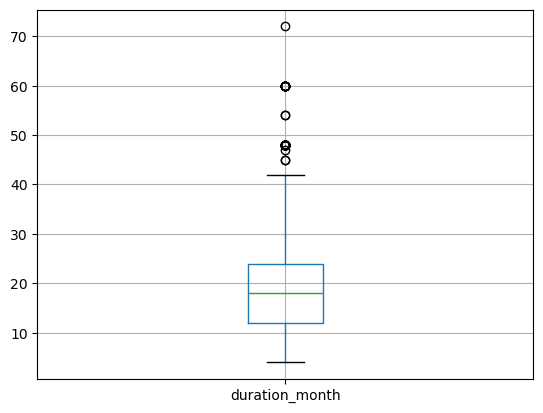

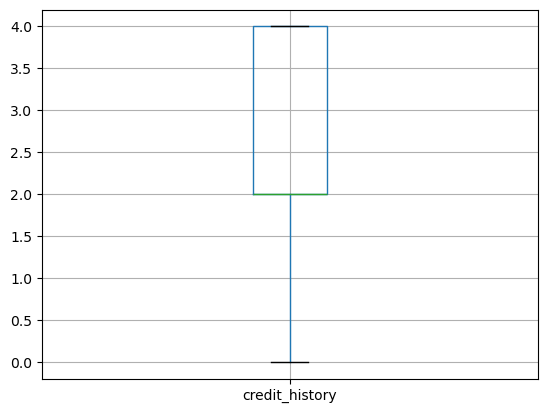

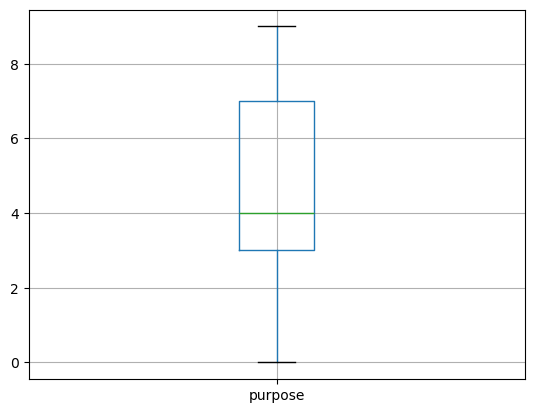

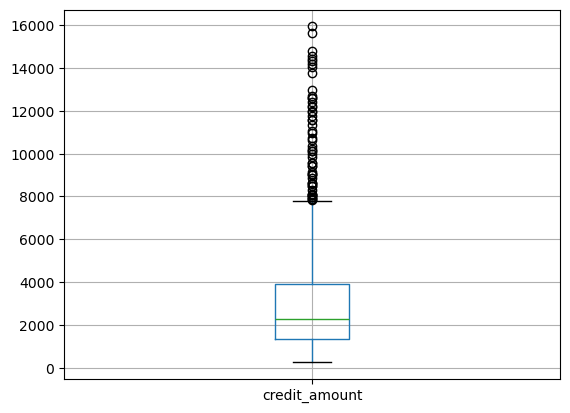

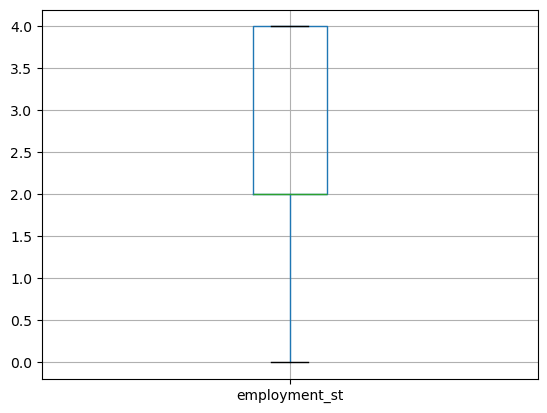

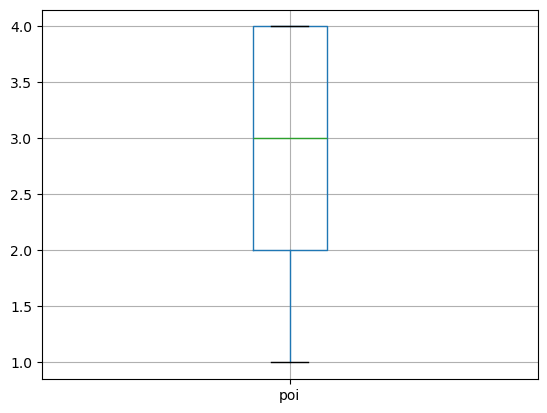

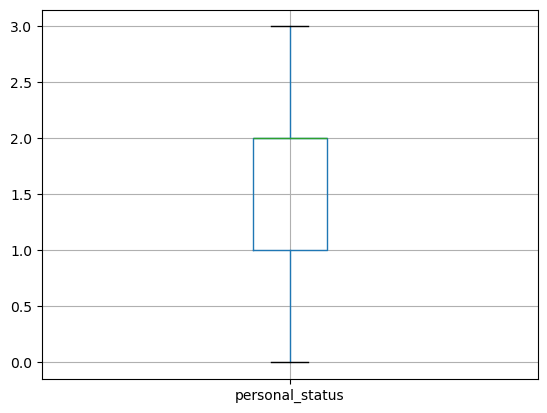

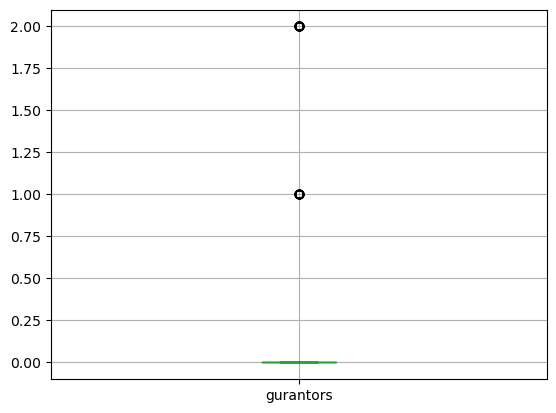

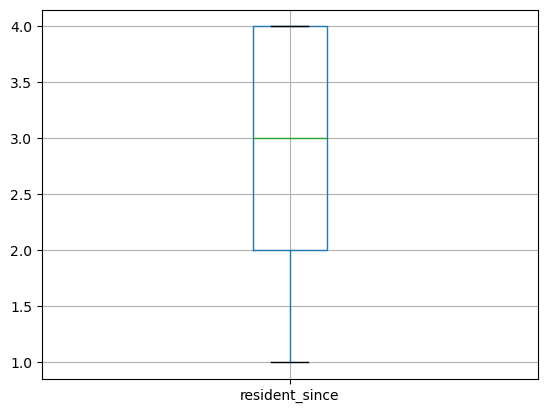

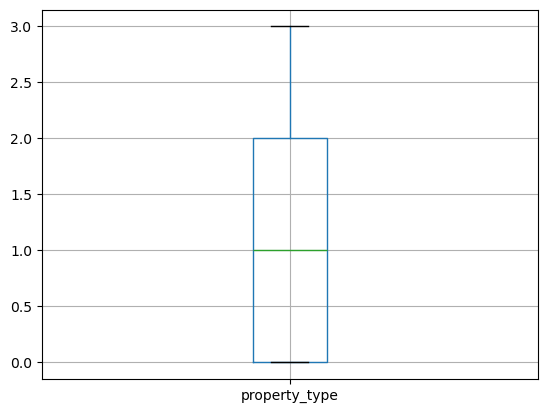

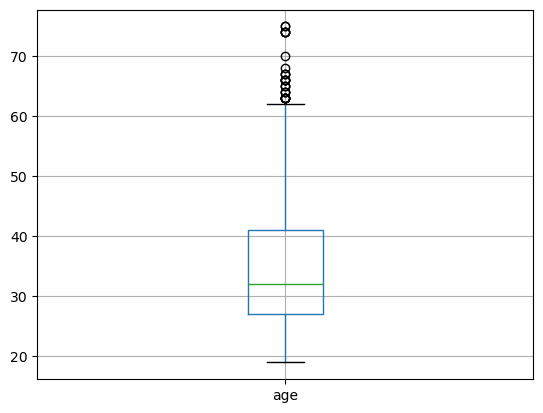

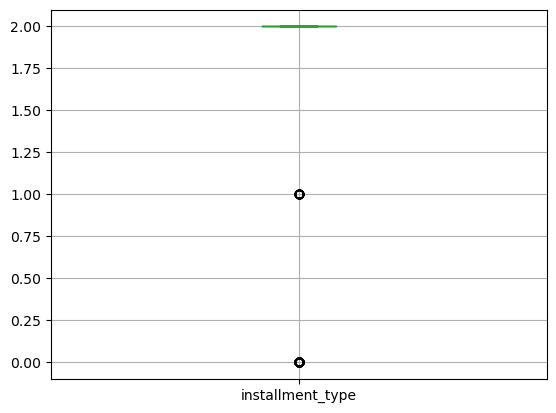

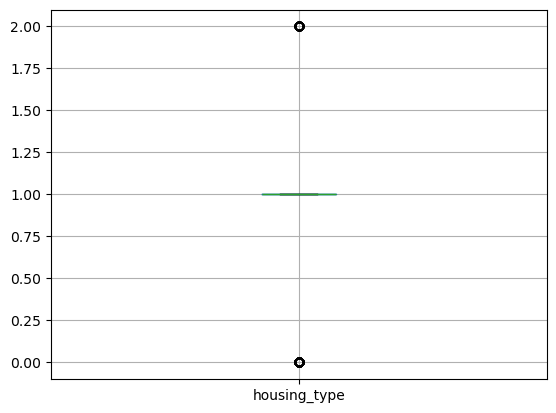

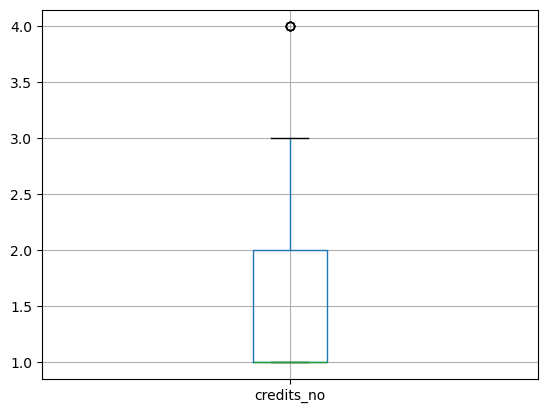

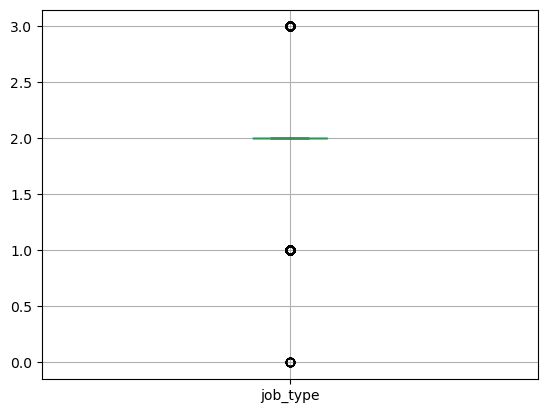

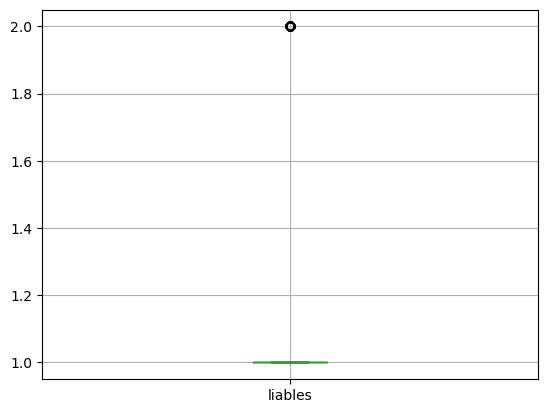

In [46]:
# Assumption 1: There should be no outliers in data
# Check box plot
for i in credit_train.columns:
    credit_train.boxplot(column = i)
    plt.show()

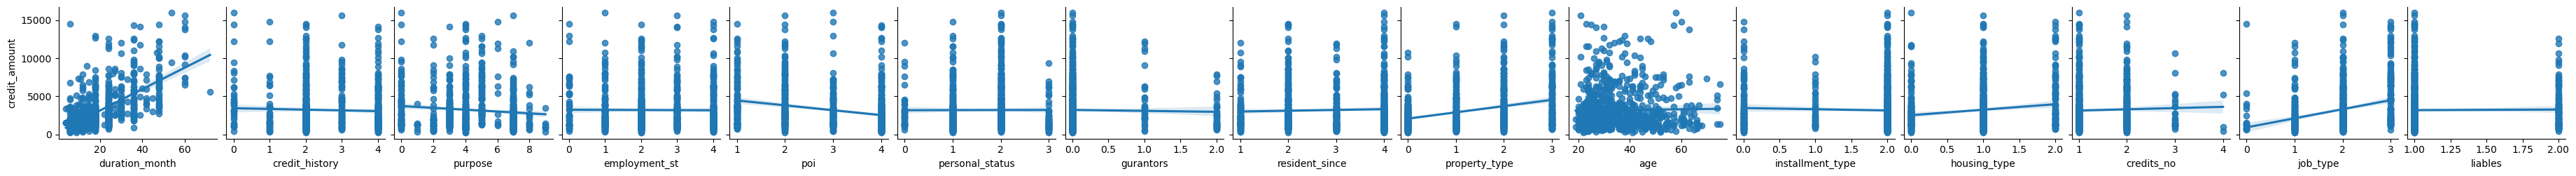

In [47]:
# Assumption 2: Assumption of linearity, every indpendent varibale should have a linear relationship with dependent variable

sns.pairplot(credit_train, x_vars = ['duration_month', 'credit_history', 'purpose','employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables'], y_vars = ["credit_amount"], kind = "reg")
plt.show()

In [48]:
# Create X and Y - independent and dependent
X = credit_train.loc[:, ['duration_month', 'credit_history', 'purpose','employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables']] 
Y = credit_train.loc[:, "credit_amount"]

In [49]:
print(X.shape)
print()
print(Y.shape)

(800, 15)

(800,)


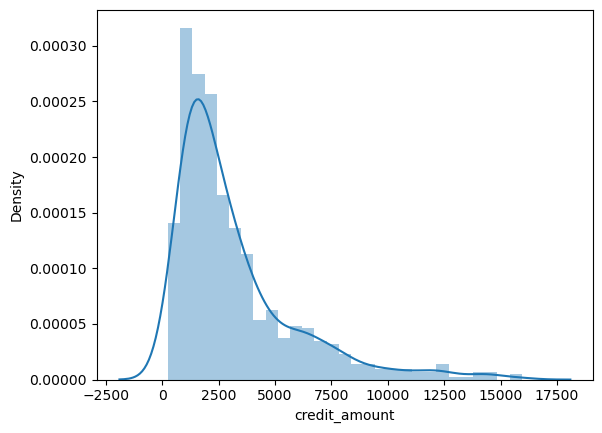

In [50]:
# Assumption of Normality: The dependent variable should follow an approximate normal distribution

sns.distplot(Y)
plt.show()

In [51]:
Y_log = np.log(Y)

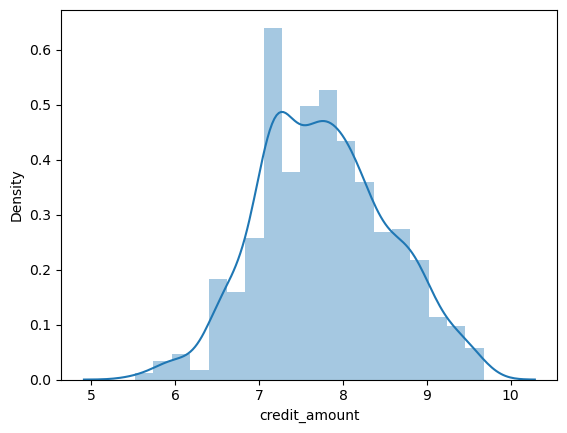

In [52]:
sns.distplot(Y_log)
plt.show()

                  duration_month  credit_history   purpose  employment_st  \
duration_month          1.000000       -0.071696 -0.057244       0.062066   
credit_history         -0.071696        1.000000  0.043797       0.104652   
purpose                -0.057244        0.043797  1.000000       0.042114   
employment_st           0.062066        0.104652  0.042114       1.000000   
poi                     0.075727        0.021242  0.094797       0.140132   
personal_status         0.015307        0.031134  0.137672       0.090431   
gurantors              -0.001722       -0.034871  0.121949       0.003683   
resident_since          0.029665        0.041209 -0.038570       0.241575   
property_type           0.283100       -0.042858 -0.024395       0.107609   
age                    -0.044506        0.155566 -0.002992       0.262042   
installment_type       -0.067813        0.112312  0.089913      -0.035469   
housing_type            0.146846        0.065768  0.046220       0.134747   

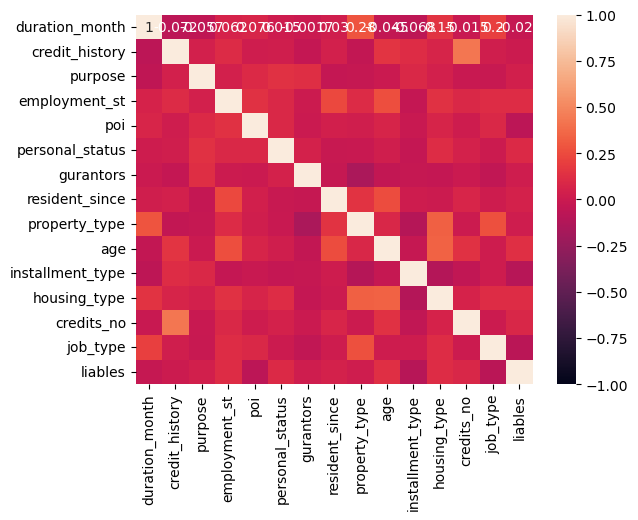

In [53]:
# Assumption of NO multi-collinearity: There should should be no multi-collinearity between the independent variables
# multi-collinearity is relationship amongst the multiple independent variables

corr_df = X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df, vmax = 1.0, vmin = -1.0, annot = True)
plt.show()

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # 1 will point to number of columns saying number of iterations
vif_df.round(2)

,features,VIF Factor
0,duration_month,4.25
1,credit_history,8.30
2,purpose,4.89
3,employment_st,5.85
4,poi,7.74
5,personal_status,6.76
6,gurantors,1.14
7,resident_since,8.35
8,property_type,3.56
9,age,13.05


In [55]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(640, 15)
(640,)
(160, 15)
(160,)


In [57]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

136.45046345803166
[ 128.50279724  -53.65892301  -59.41642454  -99.27695701 -762.77965991
  161.31177918   59.82182979   44.19219752  316.04969107   10.42976691
  192.65577568  -13.45043388  217.97128381  685.4829807   169.43314386]


In [58]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('duration_month', 128.50279724434037), ('credit_history', -53.65892300698108), ('purpose', -59.41642454285104), ('employment_st', -99.27695700668161), ('poi', -762.7796599079911), ('personal_status', 161.311779178812), ('gurantors', 59.821829790814256), ('resident_since', 44.192197524350775), ('property_type', 316.04969107308386), ('age', 10.429766911168235), ('installment_type', 192.65577568041493), ('housing_type', -13.450433877378828), ('credits_no', 217.97128381166652), ('job_type', 685.482980701547), ('liables', 169.43314385777234)]


In [59]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[1815.60904811 4190.02239332 5299.09038976 7034.86540632 4842.46759841
 1820.40560271 5975.20082757 1026.92971711 3160.64909849 5130.54679322
 2102.44133373 1460.25757046 5044.29600989 1310.56057586 4145.51317938
 2518.58341225 2391.7504911  5833.71727746 2350.24119314 5338.53039309
 1378.97529228 1883.86123948 6323.97717501 6953.04681656  592.37085868
 2854.43726995 2239.24114594 4900.59047724 1918.87534858 2330.91839773
 4369.10684325 5135.75192729  716.06222753 3235.20909528 8440.16199725
 2158.07025182 3967.27918416 1906.58921264 2284.90250996 3007.7350045
 2541.43218307 3319.22110286 2575.39926328 3135.60355226 4434.15857459
 -217.30261185 4086.30722346 5196.68227704 6595.62263971  396.63289757
 3348.62984021 4329.02500249 -306.39827496  986.4555024  3061.96308828
 1997.09204675 2434.90233964 2199.19248156 7677.70639919 3617.1255196
 6119.76855918 1752.56789554 1538.66022585 3018.09216267  666.94565276
 2793.4226319  1919.66463002 2356.48633747 7129.21158286 3351.12554965
 3356.90

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6442505665365308
RMSE: 1649.8437070672537
Adj R-square: 0.637444136049347


In [61]:
print(Y_test.min())
print(Y_test.max())

339
14782


In [62]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size = 0.2, random_state = 10)

In [63]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(640, 15)
(640,)
(160, 15)
(160,)


In [64]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.030249639601196
[ 0.03661957 -0.00180158 -0.01698475 -0.02286554 -0.24500387  0.02324568
  0.00499577 -0.00824299  0.09966661  0.0027945   0.05352355 -0.04403048
  0.03914666  0.21165393  0.08478812]


In [65]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[7.37756893 8.07966128 8.4487681  8.89553586 8.2210705  7.37093049
 8.54231562 7.1140123  7.71510528 8.3290133  7.47590563 7.26154902
 8.21385567 7.18544895 8.01386511 7.57675962 7.49337676 8.53297403
 7.55306494 8.50586114 7.25842167 7.38701755 8.71970869 8.9149896
 6.97764059 7.72759581 7.47041585 8.31248216 7.43588749 7.51990947
 8.11521983 8.30208377 7.03203499 7.77987497 9.35457109 7.42346284
 8.01461608 7.34198701 7.49512926 7.81204076 7.60836349 7.85051177
 7.65722666 7.69958096 8.11256584 6.83885532 7.9804137  8.33529462
 8.7748835  6.91743779 7.78604607 8.14110105 6.67287854 7.07088642
 7.82664188 7.47916079 7.55453754 7.55520873 9.08824945 7.97126916
 8.68229569 7.34752197 7.33399982 7.85700114 6.99675489 7.77512028
 7.39558306 7.55644493 8.92060012 7.89110271 7.83132922 7.26661338
 7.54910387 7.7981066  9.18486748 7.66870875 7.79580146 7.40465988
 8.3961849  8.04263835 7.55659834 7.12030963 7.34236799 7.36022129
 9.74972613 8.54956819 8.23431906 8.07076042 7.17913866 7.48336

In [66]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

normalization_factor = Y_test.max() - Y_test.min()

Normalized_Root_Mean_Squared_Error = (1-rmse/normalization_factor)*100
print("Normalized Root Mean Squared Error:", Normalized_Root_Mean_Squared_Error)

R-squared: 0.6650472939459412
RMSE: 0.4738340286736342
Adj R-square: 0.6586387600290906
Normalized Root Mean Squared Error: 87.44865511905363


In [67]:
print(Y_test.min())
print(Y_test.max())

5.82600010738045
9.601165503344832


In [68]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train, Y_train)

"""
previous values:
7.030249639601196
[ 0.03661957 -0.00180158 -0.01698475 -0.02286554 -0.24500387  0.02324568
  0.00499577 -0.00824299  0.09966661  0.0027945   0.05352355 -0.04403048
  0.03914666  0.21165393  0.08478812]
"""

# print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

7.032634131692461
[ 0.03662404 -0.00171746 -0.01699022 -0.02277529 -0.2447074   0.02316711
  0.0048655  -0.00820808  0.09956027  0.00279037  0.0533249  -0.04360454
  0.03885694  0.21070949  0.08366194]


In [69]:
Y_pred = rid.predict(X_test)
print(Y_pred)

[7.37698398 8.07823511 8.44814851 8.89407059 8.22082026 7.37106275
 8.54056771 7.114035   7.71437437 8.32778607 7.47586441 7.26285425
 8.21478425 7.18559244 8.01301106 7.577386   7.49310176 8.53267808
 7.55282646 8.50613502 7.25810455 7.38712967 8.71870421 8.91561014
 6.97819548 7.7281068  7.46993566 8.31105613 7.43693095 7.51912433
 8.11555169 8.30095825 7.03192784 7.77949574 9.35410411 7.4221749
 8.01380523 7.34141622 7.49435977 7.8126711  7.60892498 7.84991908
 7.65639321 7.69976334 8.11292436 6.83986168 7.98079077 8.33466483
 8.77425544 6.9175943  7.78681602 8.14024238 6.67447455 7.07151787
 7.82571738 7.47884338 7.55399162 7.55512084 9.08889604 7.97029028
 8.68150152 7.34704963 7.33375658 7.85552115 6.99891324 7.77436907
 7.39482492 7.55741018 8.91972707 7.8899699  7.83047341 7.26687149
 7.55049402 7.79784292 9.18414776 7.66922287 7.79574888 7.40533856
 8.39331456 8.04343588 7.55706762 7.12040677 7.34350367 7.36032699
 9.74905426 8.54767316 8.23478001 8.0725059  7.1800651  7.48353

In [70]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

normalization_factor = Y_test.max() - Y_test.min()

Normalized_Root_Mean_Squared_Error = (1-rmse/normalization_factor)*100
print("Normalized Root Mean Squared Error:", Normalized_Root_Mean_Squared_Error)

R-squared: 0.6649604607710353
RMSE: 0.47389544308545
Adj R-square: 0.658550265505175
Normalized Root Mean Squared Error: 87.44702831849328


In [71]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, Y_train)

"""
previous values:
7.030249639601196
[ 0.03661957 -0.00180158 -0.01698475 -0.02286554 -0.24500387  0.02324568
  0.00499577 -0.00824299  0.09966661  0.0027945   0.05352355 -0.04403048
  0.03914666  0.21165393  0.08478812]
"""

# print intercept and coefficients
print(las.intercept_)
print(las.coef_)

7.120968924662855
[ 0.03176494  0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [72]:
Y_pred = las.predict(X_test)
print(Y_pred)

[7.50214817 7.88332742 7.88332742 8.26450667 7.88332742 7.50214817
 7.88332742 7.50214817 7.88332742 7.88332742 7.50214817 7.31155855
 8.26450667 7.4386183  7.4386183  7.40685336 7.6927378  8.35980148
 7.50214817 8.07391705 7.50214817 7.6927378  8.07391705 8.61392098
 7.50214817 7.88332742 7.50214817 7.6927378  7.50214817 7.59744299
 8.26450667 7.6927378  7.31155855 7.50214817 8.64568592 7.40685336
 7.97862223 7.50214817 7.47038324 7.88332742 7.6927378  7.88332742
 7.34332349 7.59744299 8.26450667 7.50214817 7.88332742 7.9468573
 8.64568592 7.37508842 8.07391705 7.88332742 7.4386183  7.31155855
 7.4386183  7.31155855 7.50214817 7.50214817 8.64568592 7.88332742
 8.26450667 7.40685336 7.50214817 7.31155855 7.6927378  7.31155855
 7.50214817 7.88332742 8.26450667 7.40685336 7.50214817 7.59744299
 7.50214817 7.50214817 8.64568592 7.88332742 7.6927378  7.50214817
 7.59744299 8.26450667 7.88332742 7.4386183  7.6927378  7.6927378
 9.02686517 7.88332742 8.35980148 8.4550963  7.50214817 7.692737

In [73]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

normalization_factor = Y_test.max() - Y_test.min()

Normalized_Root_Mean_Squared_Error = (1-rmse/normalization_factor)*100
print("Normalized Root Mean Squared Error:", Normalized_Root_Mean_Squared_Error)

R-squared: 0.4404838838788321
RMSE: 0.6124079239488959
Adj R-square: 0.429778856146922
Normalized Root Mean Squared Error: 83.77798428107138


In [74]:
lm.score(X_train, Y_train)

0.567531942968001

In [75]:
# Using Cross Validation
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10, random_state=10, shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=lm, X=X_train, y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.65154596 0.41404544 0.6028267  0.46723582 0.34510967 0.49465539
 0.65521615 0.56190019 0.55323049 0.62641323]
0.537217904561826


In [76]:
X.drop("liables",axis=1,inplace=True)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # 1 will point to number of columns saying number of iterations
vif_df.round(2)

,features,VIF Factor
0,duration_month,4.23
1,credit_history,8.30
2,purpose,4.83
3,employment_st,5.82
4,poi,7.74
5,personal_status,6.51
6,gurantors,1.14
7,resident_since,8.23
8,property_type,3.56
9,age,12.62


In [78]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size = 0.2, random_state = 10)

In [79]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(640, 14)
(640,)
(160, 14)
(160,)


In [80]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.12470535377399
[ 0.03654996 -0.0027677  -0.01616766 -0.02030545 -0.24842304  0.02575934
  0.00693437 -0.0086918   0.09964142  0.00307055  0.04977336 -0.04023761
  0.04243271  0.20782974]


In [81]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[7.39020233 8.0137339  8.46384669 8.83340955 8.2310151  7.37710533
 8.55990312 7.12192478 7.63414148 8.35072966 7.48629888 7.28391986
 8.22500674 7.2021652  8.03921402 7.60897792 7.50454498 8.55274869
 7.56989024 8.52180185 7.17979672 7.39715626 8.73551427 8.92851587
 6.99683177 7.72507638 7.47920182 8.32250496 7.45610152 7.4494397
 8.12069619 8.32486984 6.96044021 7.80024326 9.36123094 7.43196423
 7.93307502 7.35383911 7.49321228 7.81652793 7.61818529 7.77678069
 7.67963004 7.71785402 8.1181455  6.77482495 8.00537789 8.34815585
 8.71440701 6.93082632 7.80015603 8.13747625 6.68713296 7.09065875
 7.83228097 7.43588481 7.56787922 7.55906999 9.11168578 7.976534
 8.68736732 7.27755655 7.33899044 7.86120319 7.01371222 7.79288662
 7.39688531 7.57134365 8.93298378 7.90321035 7.8390466  7.27074045
 7.5655804  7.80876511 9.19396653 7.68483816 7.80835505 7.4114311
 8.32049975 8.0473212  7.55706702 7.05498605 7.36405347 7.35479646
 9.75972709 8.48437433 8.236606   8.09242867 7.19162492 7.49100236

In [82]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

normalization_factor = Y_test.max() - Y_test.min()

Normalized_Root_Mean_Squared_Error = (1-rmse/normalization_factor)*100
print("Normalized Root Mean Squared Error:", Normalized_Root_Mean_Squared_Error)

R-squared: 0.6663386761894049
RMSE: 0.472919732770409
Adj R-square: 0.6603880283762223
Normalized Root Mean Squared Error: 87.47287381697353


In [88]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test_antilog,Y_pred_antilog)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test_antilog,Y_pred_antilog))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5941634484705458
RMSE: 1762.1638009247526
Adj R-square: 0.5869255991439059


In [79]:
credit_test.isnull().sum()

duration_month      0
credit_history      0
purpose             0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
dtype: int64

In [80]:
credit_test.drop("liables",axis=1,inplace=True)

In [81]:
credit_test.isnull().sum()

duration_month      0
credit_history      0
purpose             0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
dtype: int64

In [82]:
new_df = pd.DataFrame()
new_df = credit_test

new_df["predicted_credit_amount"] = np.exp(lm.predict(credit_test))
new_df

,duration_month,credit_history,purpose,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,predicted_credit_amount
serial number,,,,,,,,,,,,,,,
1,24.0,4,2,4,4,2,0,4.0,3,54.0,2,2,2,2,2656.238681
2,18.0,4,7,4,3,1,2,4.0,0,48.0,0,0,2,1,1446.369512
3,18.0,4,3,4,1,1,0,4.0,1,24.0,2,1,2,2,3352.785899
4,12.0,4,7,4,4,2,0,4.0,2,35.0,2,1,2,2,1404.566754
5,12.0,2,4,0,1,1,0,2.0,0,24.0,2,0,1,0,1752.369668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12.0,2,3,3,3,1,0,4.0,0,31.0,2,1,1,1,1210.552185
197,30.0,2,5,2,4,0,0,4.0,1,40.0,2,1,1,3,3021.337321
198,12.0,2,7,4,4,2,0,4.0,2,38.0,2,1,1,2,1366.213785


In [83]:
'credit_history',
 'purpose',
 'employment_st',
 'personal_status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type'

IndentationError: unexpected indent (1847271055.py, line 2)

In [ ]:
colname

In [ ]:
# Applying Inverse Label Encoder
for x in colname:
    credit_test[x]=le.inverse_transform(credit_test[x])

credit_test

In [ ]:
X.drop("personal_status",axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # 1 will point to number of columns saying number of iterations
vif_df.round(2)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size = 0.2, random_state = 10)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

In [ ]:
Y_pred = lm.predict(X_test)
print(Y_pred)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

normalization_factor = Y_test.max() - Y_test.min()

Normalized_Root_Mean_Squared_Error = (1-rmse/normalization_factor)*100
print("Normalized Root Mean Squared Error:", Normalized_Root_Mean_Squared_Error)

In [ ]:
X.drop("age",axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # 1 will point to number of columns saying number of iterations
vif_df.round(2)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size = 0.2, random_state = 10)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

In [ ]:
Y_pred = lm.predict(X_test)
print(Y_pred)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

normalization_factor = Y_test.max() - Y_test.min()

Normalized_Root_Mean_Squared_Error = (1-rmse/normalization_factor)*100
print("Normalized Root Mean Squared Error:", Normalized_Root_Mean_Squared_Error)

In [ ]:
credit_train.columns

In [ ]:
credit_df.loc[(credit_df["account_info"].isna()) & (credit_df["duration_month"].isna()) & (credit_df["savings_account"].isna()) & 
              (credit_df["gurantors"].isna()) & (credit_df["resident_since"].isna()) & (credit_df["age"].isna()) & 
              (credit_df["telephone"].isna()) & (credit_df["foreigner"].isna())]

In [ ]:
# Assumption of NO multi-collinearity: There should should be no multi-collinearity between the independent variables
# multi-collinearity is relationship amongst the multiple independent variables

corr_df = X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df, vmax = 1.0, vmin = -1.0, annot = True)
plt.show()

In [ ]:
credit_df.insert(18, 'credit_amount', credit_df.pop('credit_amount'))
credit_df

In [ ]:
credit_df.loc[(credit_df[" credit_amount"] > 1000)]